In [ ]:
%matplotlib notebook


# Feature selection using Subset selection and Lasso

Use stepwise procedures or Lasso to select the best
features from the Boston dataset.



In [1]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
# We use Forward stepwise selection, aka Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit

# Get the three most significant features
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=4,fit_intercept=True, normalize=True)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()

sel_feat_name= boston['feature_names'][idx_r] ;
print("Most significant features: " + str(sel_feat_name) )

Most significant features: ['CHAS' 'RM' 'PTRATIO' 'LSTAT']


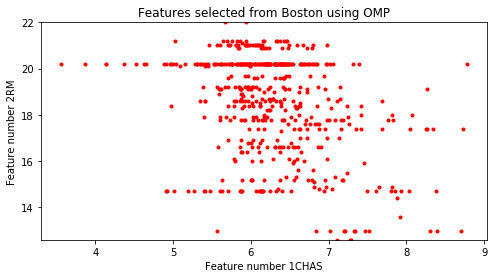

In [3]:
# Plot the selected two first features from X.
plt.figure (figsize=(8,4))
plt.title(
    "Features selected from Boston using OMP" )
feature1 = X[:, idx_r[1] ]
feature2 = X[:, idx_r[2] ]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1" + sel_feat_name[0])
plt.ylabel("Feature number 2" + sel_feat_name[1])
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [4]:
# We use Backward stepwise selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
estimator = LinearRegression(fit_intercept=True, normalize=True)
backsel= RFE(estimator, 4) 
backsel.fit(X,y)
idx_r= backsel.support_ 
print("features rank: " + str(backsel.ranking_) )
sel_feat_name= boston['feature_names'][idx_r] ;
print("Most significant features: " + str(sel_feat_name) )


features rank: [ 5  7  6  1  1  1 10  2  4  8  1  9  3]
Most significant features: ['CHAS' 'NOX' 'RM' 'PTRATIO']


In [5]:
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV(cv=5)
clf.fit(X, y)
idx_r, = clf.coef_.nonzero()
print("Lasso: cross validated penalty parameter -log10(alpha)= " + str(-np.log10(clf.alpha_) ) )
print("Lasso: number of non-zero features: " + str(idx_r.shape[0]) )


# Set a number of features equal to three
sfm = SelectFromModel(clf, max_features=4)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
X_transform = sfm.transform(X)

sel_feat_name= boston['feature_names'][sfm.get_support()] ;
print('Three most significant features: ' + str(sel_feat_name) )


Lasso: cross validated penalty parameter -log10(alpha)= 0.1397695749801213
Lasso: number of non-zero features: 10
Three most significant features: ['RM' 'DIS' 'PTRATIO' 'LSTAT']


Computing regularization path using the LARS ...
.

/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


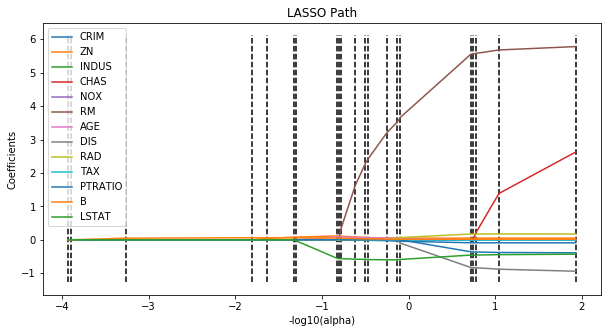

In [6]:
from sklearn.linear_model import lars_path

print("Computing regularization path using the LARS ...")
alphas, actives, coefs = lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

m_log_alphas = -np.log10(alphas)
xx= m_log_alphas.T

plt.figure (figsize=(10,5))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('-log10(alpha)')

plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend( boston['feature_names'] )
plt.show()